<a href="https://colab.research.google.com/github/htsnet/selecao-atributos-com-extratreesclassifier/blob/master/Selecao_Atributo_com_ExtraTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraTreeClassifier

Avaliação da importância dos atributos com o ExtraTreeClassifier

##Etapa 1 - Importação de bibliotecas

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

##Etapa 1 - Carregamento da base de dados e entendimento da estrutura

In [2]:
#acessa a base de dados de imagens
dataset = fetch_olivetti_faces()

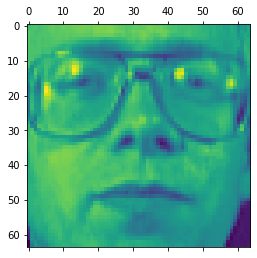

In [3]:
#mostra uma determinada imagem
plt.matshow(dataset.images[11])

In [4]:
dataset.images.shape

(400, 64, 64)

In [5]:
X = dataset.images.reshape([len(dataset.images), -1])
X.shape

(400, 4096)

In [6]:
#mostra o target do dataset
y = dataset.target
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [7]:
#mostra quantas faces tem no dataset
len(np.unique(y))

40

In [8]:
#faz a divisão do dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Etapa 3 - Modelo sem seleção de atributos

In [9]:
model_1 = ExtraTreesClassifier(n_estimators=10)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
accuracy_score(y_test, predictions_1)

0.75

In [10]:
model_1.feature_importances_

array([0.        , 0.        , 0.00119824, ..., 0.        , 0.        ,
       0.        ])

##Etapa 4 - Seleção de atributos

In [11]:
selection = ExtraTreesClassifier(n_estimators=10)
selection.fit(X, y) #aqui passa o arquivo completo e não apenas um dos separados

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [12]:
importances = selection.feature_importances_

In [13]:
importances.shape

(4096,)

In [14]:
importances_graph = importances.reshape(dataset.images[0].shape)
importances_graph.shape

(64, 64)

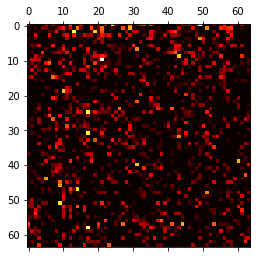

In [15]:
plt.matshow(importances_graph, cmap = plt.cm.hot)

In [22]:
len(importances)

4096

In [16]:
#procura as importâncias maiores do que 0.001
indexes = []
for i in range(len(importances)):
  if importances[i] >= 0.001:
    indexes.append(i)

In [17]:
indexes

[5,
 7,
 12,
 15,
 18,
 22,
 24,
 25,
 29,
 32,
 33,
 35,
 46,
 49,
 56,
 61,
 73,
 74,
 76,
 78,
 82,
 85,
 91,
 93,
 107,
 111,
 115,
 119,
 120,
 121,
 122,
 136,
 141,
 147,
 149,
 156,
 158,
 159,
 163,
 168,
 169,
 170,
 185,
 186,
 194,
 198,
 202,
 203,
 205,
 208,
 210,
 213,
 214,
 215,
 218,
 221,
 227,
 231,
 234,
 240,
 246,
 250,
 267,
 276,
 277,
 284,
 290,
 291,
 305,
 306,
 313,
 361,
 370,
 387,
 391,
 394,
 399,
 414,
 419,
 426,
 427,
 430,
 439,
 442,
 443,
 445,
 458,
 461,
 465,
 479,
 485,
 490,
 491,
 497,
 516,
 523,
 529,
 531,
 552,
 553,
 554,
 558,
 559,
 578,
 595,
 596,
 597,
 598,
 619,
 623,
 631,
 637,
 641,
 642,
 643,
 650,
 656,
 661,
 673,
 685,
 688,
 709,
 710,
 713,
 716,
 720,
 723,
 738,
 749,
 751,
 757,
 761,
 770,
 778,
 785,
 790,
 800,
 810,
 819,
 824,
 833,
 837,
 847,
 848,
 851,
 853,
 857,
 881,
 890,
 907,
 908,
 925,
 926,
 936,
 940,
 961,
 967,
 968,
 977,
 1001,
 1009,
 1015,
 1034,
 1056,
 1057,
 1122,
 1163,
 1226,
 1227,
 1

In [18]:
len(indexes)

375

In [19]:
X_new = X[:, indexes].reshape(len(dataset.images), -1)

In [20]:
X_new.shape

(400, 375)

#Etapa 5 - Modelo com seleção de atributos

In [21]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)
model_2 = ExtraTreesClassifier(n_estimators=10)
model_2.fit(X_train_new, y_train)
predictions_2 = model_2.predict(X_test_new)
accuracy_score(y_test, predictions_2)

0.8375